## Project 3

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.ascii
import math as mt
import astropy.constants as c
import astropy.units as u

In [2]:
spec = astropy.io.ascii.read("solar_spectrum.txt")

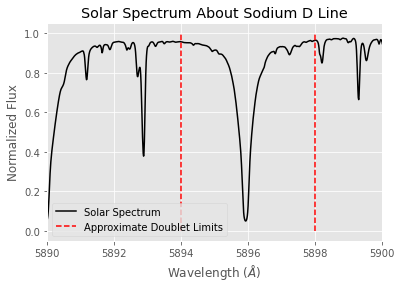

In [3]:
plt.style.use('ggplot')
plt.plot(spec["col1"], spec["col2"] / 1e4, color="black", label="Solar Spectrum")
plt.vlines(5894, 0, 1, color="red", label="Approximate Doublet Limits", linestyles="dashed")
plt.vlines(5898, 0, 1, color="red", linestyles="dashed")
plt.xlim(5890, 5900)
plt.xlabel("Wavelength ($\AA$)")
plt.ylabel("Normalized Flux")
plt.title("Solar Spectrum About Sodium D Line")
plt.legend()
plt.savefig("figs/Sodium_D_Line.pdf")

### To Find Equivalent Width

In [4]:
ind = np.where((spec["col1"] < 5898) & (spec["col1"] > 5894))
inc = np.median(np.diff(spec["col1"][ind]))
ew = np.sum(1e4 - spec["col2"][ind]) * inc / 1e4 * u.Angstrom
print("equivalent width (ew) = ", ew)

equivalent width (ew) =  0.6500030000141882 Angstrom


Get $log(EW/\lambda)$ to help determine number of sodium atoms in ground state

In [5]:
l = 5896.0 * u.Angstrom # Wavelegnth of the sodium line
np.log10(ew / l)

<Quantity -3.95764211>

<img src="http://spiff.rit.edu/classes/phys440/lectures/curve/gcurve.jpg" width="600 pt">

## Question 1: To Find the Number of Na Atoms in ground state
Using $log(EW/\lambda) = -3.96$ corresponds to a $log (N \cdot f \cdot \lambda/5000\AA) \sim 14.6$. We can colve for $N$, yielding $N = 10^{14.6} \cdot 5000\AA/(f\cdot\lambda)$. We approximate the oscillator strength for the $5896\AA$ absorption line by that for the $5890\AA$ line, being $f=0.65$.

In [6]:
osc_strength = 0.65

n_atoms = 10**14.6 * 5000 * u.Angstrom / (osc_strength * l)

print("The number of atoms per cm^2 are", n_atoms)

The number of atoms per cm^2 are 519396684262468.56


## Question 2 Estimate the # of Sodium Atoms in Excited State Vs. Ground State Using Boltzman Eq.

In [7]:
# First need to calculate a few things
# Approximating the energy change
E1 = -5.14 * u.eV # 3s1/2
E2 = -3.04 * u.eV # 3p1/2
delE = E2 - E1

t_star = 5800 * u.K

# The Lande g factors for the 3s1/2 and 3p1/2 states for sodium from Arimondo et al. 1977
gS1o2 = 2.002296
gP1o2 = 0.66581
gratio = gP1o2/gS1o2

#found online; 2 3s' electrons and 6p'
ratio_boltz = gratio*np.exp(-delE/(c.k_B *t_star))
print('Here is the ratio of excited to ground state atoms', ratio_boltz) 

Here is the ratio of excited to ground state atoms 0.004978227733280035


## Question 3 Estimate the Ratio of Neutral Sodium Atoms to Ionized Sodium Atoms Using Saha Equation

In [8]:
#calculate some things first
kT = c.k_B * t_star
h_sq = c.h**2
expo = np.exp(-((5.1*u.eV)/kT))
pe = 1 * u.N / u.m**2
z_1 = 1
z_2 = 2.4

In [9]:
ratio_saha = (2*kT/pe)*(z_1/z_2)*((kT*c.m_e*2*np.pi/h_sq)**1.5)*expo

In [10]:
print('this is the ratio of ionized atoms to neutral atoms', ratio_saha)

this is the ratio of ionized atoms to neutral atoms 2635.1361459832247 kg(3/2) m2 / (J(1/2) N s3)


In [11]:
ratio_saha.decompose()

<Quantity 2635.13614598>

## Question 4 Compute the Total Column Density of Sodium Atoms

In [12]:
sodium_abundance = (n_atoms)*(1+ratio_boltz)*(1+ratio_saha)

print('Here is the column density', sodium_abundance)

Here is the column density 1.3760165647598456e+18


## Question 5 How abundant is this versus hydrogen?

In [13]:
#given
hydrogen_abundance = 6.6*10**23 

In [14]:
ratio_abundance = sodium_abundance/hydrogen_abundance

In [15]:
print(ratio_abundance)

2.0848735829694633e-06


In [16]:
#calculating this as an astronomer 
log_abundance = 12+np.log10(ratio_abundance)

In [17]:
print(log_abundance)

6.319079726512053
